In [1]:
import dlib

from skimage import io
from matplotlib import patches
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
img = io.imread('data/selfie.jpg')

In [3]:
# Number of times the image is upsampled during prediction (0 means do not upsample).
num_times_upsampled = 0

# Positive thresholds increase the model's skepticism. Negative thresholds make it see more faces.
threshold = 0

detector = dlib.get_frontal_face_detector()
detected_faces, scores, idx = detector.run(img, num_times_upsampled, threshold)

print("Number of faces detected: {}".format(len(detected_faces)))

Number of faces detected: 2


In [4]:
idx

dlib.array([3, 0])

In [5]:
scores

dlib.array([2.34345, 1.46087])

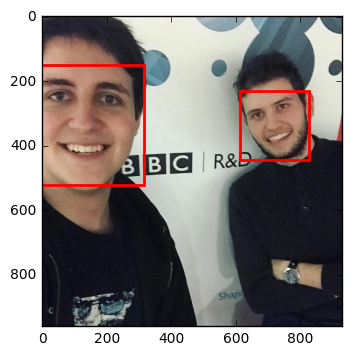

In [6]:
fig, ax = plt.subplots(1)
ax.imshow(img)

# Draw rectangles around the faces.
for detected_face in detected_faces:
    x = detected_face.left()
    y = detected_face.top()
    width = detected_face.right() - detected_face.left()
    height = detected_face.bottom() - detected_face.top()
    rectangle = patches.Rectangle((x, y),
                                  width,
                                  height,
                                  linewidth=2,
                                  edgecolor='r',
                                  facecolor='none')
    ax.add_patch(rectangle)

plt.show()